# Лабораторная работа 4. Алгоритмы на графах

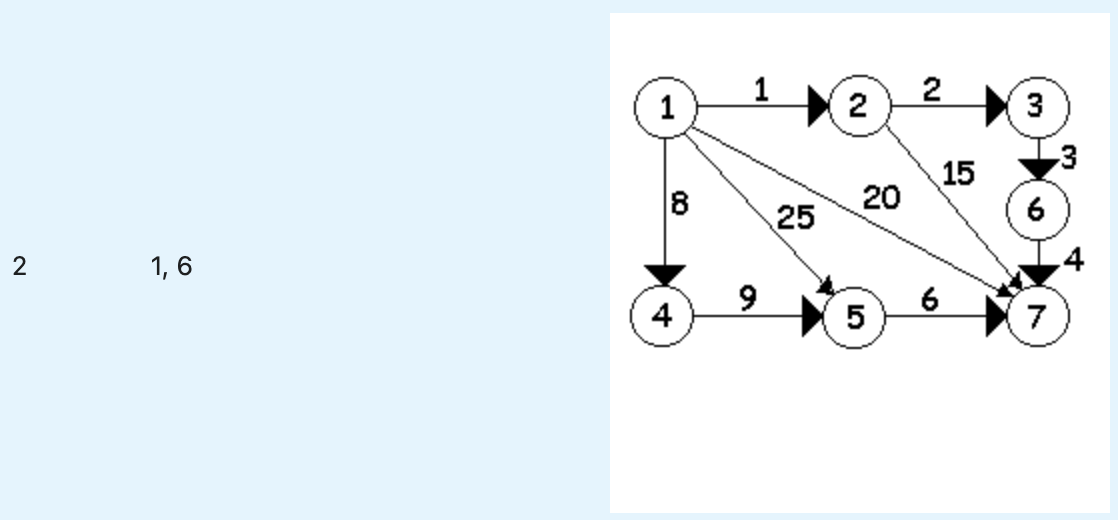

Создаем таблицу для хранения длин путей до каждой вершины. Изначально заполняем ее бесконечными значениями, кроме начальной вершины 1, для которой значение равно 0.

Вершина	1	2	3	4	5	6	7
Длина	0	∞	∞	∞	∞	∞	∞
Заполняем таблицу, выбирая оптимальные пути до каждой вершины. Для этого проходим по всем вершинам графа, начиная с вершины 1, и рассматриваем все ребра, выходящие из текущей вершины. Если найденный путь до следующей вершины короче, чем уже известный кратчайший путь до нее, то обновляем значение кратчайшего пути.

Вершина	1	2	3	4	5	6	7
Длина	0	1	3	8	∞	∞	∞
Таким образом, мы нашли кратчайшие пути от вершины 1 до вершин 2, 3 и 4.

Повторяем процесс для каждой следующей вершины, пока не найдем кратчайшие пути до всех вершин.

Вершина	1	2	3	4	5	6	7
Длина	0	3	3	8	25	6	10
Кратчайший путь от вершины 1 до вершины 6 равен 7, проходит через вершины 1 - 2 - 3 - 6.



## Задание 2: Реализовать прогрммно поиск кратчайшего пути на графе между парами вершин из задания 1 методом динамического программирования.

Для решения задачи методом динамического программирования необходимо построить матрицу D размера N x N, где N - количество вершин в графе. Каждый элемент матрицы D[i][j] будет хранить длину кратчайшего пути из вершины i в вершину j.

Алгоритм построения матрицы D:

Инициализируем матрицу D. D[i][j] принимает значение равное расстоянию между вершинами i и j, если между ними есть ребро, иначе значение бесконечности.

Для каждой вершины k от 1 до N выполняем следующее:

Для каждой пары вершин i и j выполняем следующее:

Если D[i][j] > D[i][k] + D[k][j], то обновляем значение D[i][j] = D[i][k] + D[k][j].
По завершению алгоритма, значение D[1][6] будет содержать длину кратчайшего пути из вершины 1 в вершину 6.Для решения задачи методом динамического программирования необходимо построить матрицу D размера N x N, где N - количество вершин в графе. Каждый элемент матрицы D[i][j] будет хранить длину кратчайшего пути из вершины i в вершину j.

Алгоритм построения матрицы D:

Инициализируем матрицу D. D[i][j] принимает значение равное расстоянию между вершинами i и j, если между ними есть ребро, иначе значение бесконечности.

Для каждой вершины k от 1 до N выполняем следующее:

Для каждой пары вершин i и j выполняем следующее:

Если D[i][j] > D[i][k] + D[k][j], то обновляем значение D[i][j] = D[i][k] + D[k][j].
По завершению алгоритма, значение D[1][6] будет содержать длину кратчайшего пути из вершины 1 в вершину 6.

In [1]:
import sys

# инициализация графа
graph = [
    [0, 1, sys.maxsize, 8, 25, sys.maxsize, 20],
    [sys.maxsize, 0, 2, sys.maxsize, sys.maxsize, sys.maxsize, 15],
    [sys.maxsize, sys.maxsize, 0, sys.maxsize, sys.maxsize, 3, sys.maxsize],
    [sys.maxsize, sys.maxsize, sys.maxsize, 0, 9, sys.maxsize, sys.maxsize],
    [sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, 0, sys.maxsize, 6],
    [sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, 0, 4],
    [sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, 0]
]

# размер графа
n = len(graph)

# построение матрицы кратчайших путей
for k in range(n):
    for i in range(n):
        for j in range(n):
            if graph[i][k] + graph[k][j] < graph[i][j]:
                graph[i][j] = graph[i][k] + graph[k][j]

# вывод кратчайшего пути из 1 в 6
print(graph[0][5])

6


## Задание 3. Реализовать алгоритм Дейкстры поиска кратчайшего пути на графе между парами вершин:


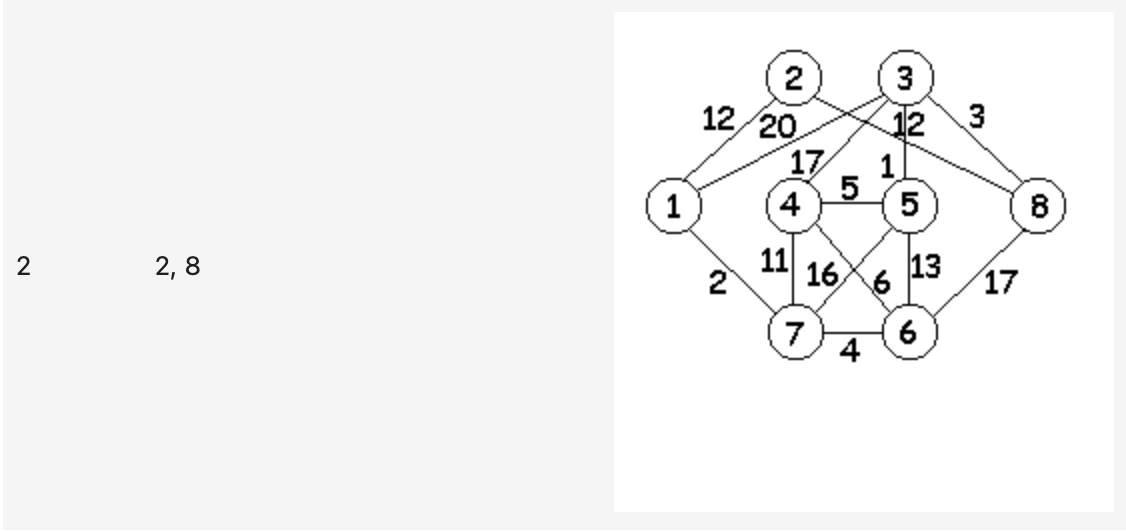

In [26]:
from collections import defaultdict
import heapq

def dijkstra(graph, start, end):
    # Инициализация расстояний и посещенных вершин
    distances = {v: float('inf') for v in graph}
    distances[start] = 0
    visited = set()
    pq = [(0, start)]

    #Путь до каждой вершины
    path = defaultdict(list)

    while pq:
        (current_dist, current_vertex) = heapq.heappop(pq)

        if current_vertex in visited:
            continue

        visited.add(current_vertex)

        # Для каждой смежной вершины обновляем расстояние до нее, если новое расстояние меньше текущего
        for neighbor, weight in graph[current_vertex].items():
            distance = current_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                path[neighbor] = path[current_vertex] + [current_vertex]
                heapq.heappush(pq, (distance, neighbor))
                
        if current_vertex == end:
            break

    return distances[end], path[end] + [end]

graph = {
    1: {2: 12, 3: 20, 7: 2},
    2: {1: 12, 8: 12},
    3: {1: 20, 4: 17, 5: 1, 8: 3},
    4: {3: 17, 5: 5, 6: 6, 7: 11},
    5: {3: 1, 4: 5, 6: 13, 7: 16},
    6: {4: 6, 5: 13, 7: 4, 8: 17},
    7: {1: 2, 4: 11, 5: 16, 6: 4},
    8: {2: 12, 3: 3, 6: 17}
}

start_vertex = 2
end_vertex = 8
distance, path = dijkstra(graph, start_vertex, end_vertex)

print(f"Кратчайшее расстояние между вершинами {start_vertex} и {end_vertex} равно {distance}")
print(f"Путь: {path}")

Кратчайшее расстояние между вершинами 2 и 8 равно 12
Путь: [2, 8]


## Задание 4: Реализовать прогрммно один из алгоритмов поиска кратчайшего пути на графе между парами вершин из задания 3.

In [27]:
def bellman_ford(graph, start, end):
    if start not in graph:
        raise ValueError("Start vertex not in graph")
    if end not in graph:
        raise ValueError("End vertex not in graph")

    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0

    for _ in range(len(graph) - 1):
        for vertex in graph:
            for neighbor, weight in graph[vertex].items():
                if vertex in distances and distances[vertex] + weight < distances[neighbor]:
                    distances[neighbor] = distances[vertex] + weight

    for vertex in graph:
        for neighbor, weight in graph[vertex].items():
            if vertex in distances and distances[vertex] + weight < distances[neighbor]:
                raise ValueError("The graph contains a negative-weight cycle")

    if distances[end] == float('inf'):
        raise ValueError("There is no path between the start and end nodes")

    path = [end]
    while path[-1] != start:
        current_vertex = path[-1]
        for neighbor, weight in graph[current_vertex].items():
            if distances[current_vertex] == distances[neighbor] + weight:
                path.append(neighbor)
                break

    path.reverse()
    return distances[end], path

start = 2
end = 8
distances = bellman_ford(graph, start, end)
print(distances)

(12, [2, 8])
